In [16]:
from keras.datasets import mnist
import numpy as np
from matplotlib import pyplot as plt
import keras
from keras.layers import Convolution2D, MaxPooling2D, Activation, Dense, Flatten, Reshape, Input,UpSampling2D
from keras.models import Model


(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.##normalize the training data
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


In [22]:
from keras.layers import UpSampling2D

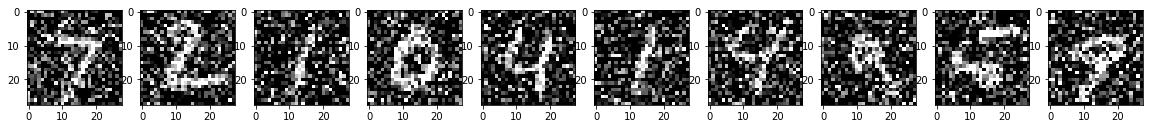

In [17]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    #plt.gray()
    
plt.show()

In [23]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Convolution2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (7, 7, 32)

x = Convolution2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [24]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
19456/60000 [========>.....................] - ETA: 233s - loss: 0.3038

KeyboardInterrupt: 